In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

from os import listdir
from os.path import isfile, join
import pandas as pd
from sklearn.model_selection import train_test_split
import gc; gc.enable() # memory is tight

from keras import layers, models
from keras import backend as K
from keras.optimizers import Adam


%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from kitti_object import kitti_object, show_lidar_with_depth, show_lidar_on_image, \
                         show_image_with_boxes, show_lidar_topview_with_boxes

import random
from shutil import copyfile

In [10]:
from mayavi import mlab
mlab.init_notebook('png')

Notebook initialized with png backend.


In [11]:
# pandas, sklearn, keras, tensorflow

In [12]:
# img_dir = 'kitti dataset/'
# ../input/kitti_single/training/label_2/
train_label_dir = '../data/training/label_2/'
# label_test_image_dir = os.path.join(os.getcwd(), 'streets\\test\\labels\\')

train_image_dir = '../data/training/image_2/'
# test_image_dir = os.path.join(os.getcwd(), 'streets\\test\\images\\')

train_calib_dir = '../data/training/calib/'

train_velo_dir = '../data/training/velodyne/'

images =  [(train_image_dir+f) for f in listdir(train_image_dir) if isfile(join(train_image_dir, f))]
labels = [(train_label_dir+f) for f in listdir(train_label_dir) if isfile(join(train_label_dir, f))]
calibs = [(train_calib_dir+f) for f in listdir(train_calib_dir) if isfile(join(train_calib_dir, f))]
velos = [(train_velo_dir+f) for f in listdir(train_velo_dir) if isfile(join(train_velo_dir, f))]

df = pd.DataFrame(np.column_stack([images, labels, calibs, velos]), columns=['images', 'labels', 'calibs', 'velos'])
df

,images,labels,calibs,velos
0,../data/training/image_2/000001.png,../data/training/label_2/000000.txt,../data/training/calib/000000.txt,../data/training/velodyne/000000.bin
1,../data/training/image_2/000000.png,../data/training/label_2/000001.txt,../data/training/calib/000001.txt,../data/training/velodyne/000001.bin
2,../data/training/image_2/000002.png,../data/training/label_2/000002.txt,../data/training/calib/000002.txt,../data/training/velodyne/000002.bin


In [13]:
df1 = df.sort_values(by='images')['images'].reset_index()

In [21]:
n = 3 # change this to what you want
# Shuffle the image ids
# print(df1['images'][0])
file_array = df1['images']
random.shuffle(file_array)
ids = file_array[:n]
file = []
for x in ids:
    file.append(x.split("/")[4].split(".")[0])
print(file)

['000000', '000001', '000002']


In [22]:
base_dir = '../data/training/'
dataset_dir = '../data_generator/training/'
# type_dir = 'train'

if not os.path.isdir(dataset_dir):
    os.makedirs(dataset_dir)
else:
    shutil.rmtree("../data_generator")
if not os.path.isdir(os.path.join(dataset_dir, 'calib/')):
    os.makedirs(os.path.join(dataset_dir, 'calib/'))
if not os.path.isdir(os.path.join(dataset_dir, 'image_2/')):
    os.makedirs(os.path.join(dataset_dir, 'image_2/'))
if not os.path.isdir(os.path.join(dataset_dir, 'label_2/')):
    os.makedirs(os.path.join(dataset_dir, 'label_2/'))
if not os.path.isdir(os.path.join(dataset_dir, 'velodyne/')):
    os.makedirs(os.path.join(dataset_dir, 'velodyne/'))
for x in file:
    copyfile(base_dir + "calib/" + x + ".txt" , dataset_dir + "calib/" + x + ".txt" )
    copyfile(base_dir + "image_2/" + x + ".png" , dataset_dir + "image_2/" + x + ".png" )
    copyfile(base_dir + "label_2/" + x + ".txt" , dataset_dir + "label_2/" + x + ".txt" )
    copyfile(base_dir + "velodyne/" + x + ".bin" , dataset_dir + "velodyne/" + x + ".bin" )
    

../data_generator/ training


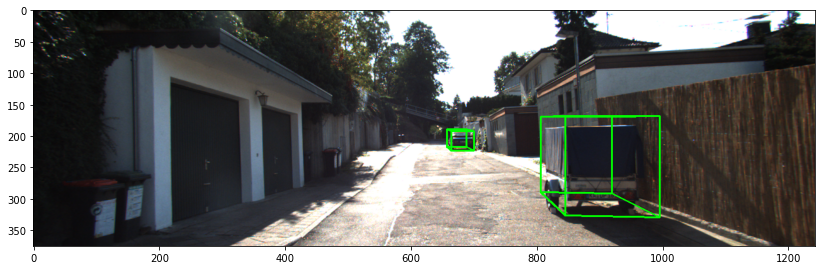

In [24]:
dataset = kitti_object('../data_generator/')

data_idx = 2
objects = dataset.get_label_objects(data_idx)
calib = dataset.get_calibration(data_idx)
img = dataset.get_image(data_idx)

img_bbox_2d, img_bbox3d = show_image_with_boxes(img, objects, calib)
img_bbox3d = cv2.cvtColor(img_bbox3d, cv2.COLOR_BGR2RGB)

fig_bbox3d = plt.figure(figsize=(14, 7))
ax_bbox3d = fig_bbox3d.subplots()
ax_bbox3d.imshow(img_bbox3d)
plt.show()